In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [32]:
df = pd.read_csv("../../dataset/ERIC.csv")
# 2. Đọc file csv và gắng index với giá Close
df1=df.reset_index()['Close']

In [33]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [34]:
# 4. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [35]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [36]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [37]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
X_val = X_val.reshape(X_val.shape[0],X_val.shape[1] , 1)

In [38]:
# 8. Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [39]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100


31/31 [==============================] - 8s 125ms/step - loss: 0.0569 - val_loss: 0.0066
Epoch 2/100
31/31 [==============================] - 3s 109ms/step - loss: 0.0045 - val_loss: 0.0021
Epoch 3/100
31/31 [==============================] - 4s 120ms/step - loss: 0.0025 - val_loss: 0.0022
Epoch 4/100
31/31 [==============================] - 4s 127ms/step - loss: 0.0023 - val_loss: 0.0023
Epoch 5/100
31/31 [==============================] - 4s 135ms/step - loss: 0.0023 - val_loss: 0.0021
Epoch 6/100
31/31 [==============================] - 4s 125ms/step - loss: 0.0023 - val_loss: 0.0020
Epoch 7/100
31/31 [==============================] - 4s 121ms/step - loss: 0.0021 - val_loss: 0.0021
Epoch 8/100
31/31 [==============================] - 4s 121ms/step - loss: 0.0025 - val_loss: 0.0018
Epoch 9/100
31/31 [==============================] - 4s 118ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 10/100
31/31 [==============================] - 4s 117ms/step - loss: 0.0019 - val_loss: 0.0017
E

In [40]:
# 10. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)
y_pred_val=model.predict(X_val)

18/18 [==============================] - 0s 25ms/step


In [41]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
y_pred_val=scaler.inverse_transform(y_pred_val)

In [42]:
y_test = scaler.inverse_transform(ytest.reshape(-1,1))
y_test

y_val = scaler.inverse_transform(yval.reshape(-1,1))
y_val

array([[13.05],
       [12.85],
       [12.71],
       [12.61],
       [12.56],
       [12.66],
       [12.53],
       [12.79],
       [12.75],
       [12.46],
       [12.08],
       [12.13],
       [12.07],
       [12.47],
       [12.57],
       [13.43],
       [13.48],
       [13.68],
       [13.78],
       [13.7 ],
       [13.39],
       [13.33],
       [13.38],
       [13.47],
       [13.18],
       [13.21],
       [13.52],
       [13.37],
       [13.28],
       [13.19],
       [13.07],
       [13.4 ],
       [13.52],
       [13.61],
       [13.95],
       [13.98],
       [13.8 ],
       [13.98],
       [13.68],
       [13.84],
       [14.05],
       [13.74],
       [13.54],
       [14.34],
       [14.09],
       [14.16],
       [14.13],
       [14.14],
       [14.04],
       [13.97],
       [13.79],
       [13.89],
       [13.46],
       [13.69],
       [13.69],
       [13.9 ],
       [13.63],
       [13.29],
       [12.97],
       [13.02],
       [13.26],
       [13.16],
       [

In [43]:
# 12. Đánh giá độ chính xác thuật toán bằng RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_mae = np.mean(np.abs(y_pred - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mape = np.mean(np.abs((y_pred - y_val) / y_val)) * 100
test_mape = np.mean(np.abs((y_pred - y_test) / y_test)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAPE:', test_mae)
print('Validation MAE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 9.258220838349757
Testing RMSE: 8.622230205564259
Validation MAE: 8.54507413846303
Testing MAPE: 8.564128706298087
Validation MAE: 33.826239998864686
Testing MAPE: 1.5806396345446097


In [44]:
# 13. Dự báo 30 ngày tiếp theo
x_input = val_data[60:].reshape(1, -1)
x_input_shape = x_input.shape[1]

temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > n_steps:
        x_input = np.array(temp_input[1:n_steps+1])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, x_input_shape, 1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i += 1


0 day input [0.65242165 0.65811966 0.65337132 0.65622032 0.65716999 0.67426401
 0.66381766 0.67426401 0.68281102 0.6980057  0.69325736 0.67901235
 0.68471035 0.665717   0.66381766 0.65432099 0.64957265 0.65622032
 0.65337132 0.66381766 0.65716999 0.662868   0.7008547  0.68186135
 0.75498575 0.64387464 0.72364672 0.75023742 0.75308642 0.79012346
 0.79202279 0.78822412 0.80531814 0.82336182 0.8300095  0.8300095
 0.8357075  0.80911681 0.78632479 0.77872745 0.75973409 0.74643875
 0.73694207 0.73219373 0.74169041 0.72934473 0.75403609 0.75023742
 0.72269706 0.68660969 0.69135802 0.68566002 0.72364672 0.7331434
 0.81481481 0.81956315 0.83855651 0.84805318 0.84045584 0.81101614
 0.80531814 0.81006648 0.81861349 0.79107312 0.79392213 0.82336182
 0.80911681 0.8005698  0.79202279 0.78062678 0.81196581 0.82336182
 0.83190883 0.86419753 0.86704653 0.84995252 0.86704653 0.83855651
 0.85375119 0.87369421 0.84425451 0.82526116 0.90123457 0.87749288
 0.88414055 0.88129155 0.88224122 0.87274454 0.86609

0 day output [[0.8053933]]
1 day input [0.65811966 0.65337132 0.65622032 0.65716999 0.67426401 0.66381766
 0.67426401 0.68281102 0.6980057  0.69325736 0.67901235 0.68471035
 0.665717   0.66381766 0.65432099 0.64957265 0.65622032 0.65337132
 0.66381766 0.65716999 0.662868   0.7008547  0.68186135 0.75498575
 0.64387464 0.72364672 0.75023742 0.75308642 0.79012346 0.79202279
 0.78822412 0.80531814 0.82336182 0.8300095  0.8300095  0.8357075
 0.80911681 0.78632479 0.77872745 0.75973409 0.74643875 0.73694207
 0.73219373 0.74169041 0.72934473 0.75403609 0.75023742 0.72269706
 0.68660969 0.69135802 0.68566002 0.72364672 0.7331434  0.81481481
 0.81956315 0.83855651 0.84805318 0.84045584 0.81101614 0.80531814
 0.81006648 0.81861349 0.79107312 0.79392213 0.82336182 0.80911681
 0.8005698  0.79202279 0.78062678 0.81196581 0.82336182 0.83190883
 0.86419753 0.86704653 0.84995252 0.86704653 0.83855651 0.85375119
 0.87369421 0.84425451 0.82526116 0.90123457 0.87749288 0.88414055
 0.88129155 0.88224122 0

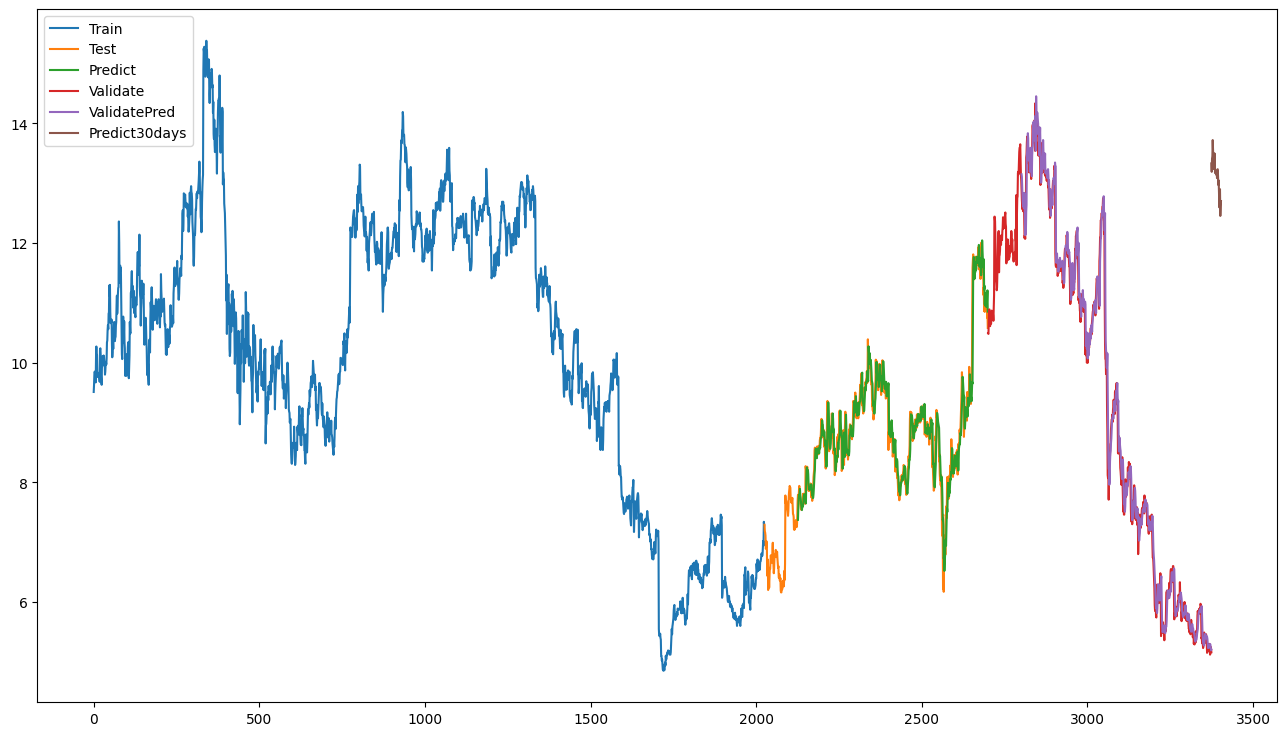

In [45]:
# 14.Vẽ hình
plt.figure(figsize=(16,9))
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+101, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))
plt.legend(['Train','Test','Predict','Validate','ValidatePred','Predict30days'])

plt.show()